# Flow Intercepting Facility Location Problems (FIFLP)

The first flow-based location model, the Flow-Capturing Location Model (FCLM), was proposed by Hodgson in 1990. Then, the Flow-Intercepting Location Model (FILM) was proposed by Berman et al.in 1992. In these models, demand is defined primarily by the flow on a predetermined route (usually the shortest path between origin and destination (O-D)). The basic models for such problems are developed, and heuristic algorithms are proposed for their solution. These models assume that flows can only be captured if there are service facilities on the path. Berman et al. relaxed this assumption by proposing that facilities 'near' these paths still have 'utility' for consumers. He defined deviation distance as the "extra distance" that consumers' deviation from the original path, and investigated the problem of interception siting considering the deviation distance. Mirchandani et al. demonstrated that the traditional interception siting problem is an NP-hard problem, and therefore, the computation time grows exponentially with the number of nodes.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#Minimization-of-the-Number-of-Facilities-for-Gain-Maximization" data-toc-modified-id="Minimization-of-the-Number-of-Facilities-for-Gain-Maximization-1.1">Minimization of the Number of Facilities for Gain Maximization</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Case1. Solving FIFLP (Minimization of the Number of Facilities for Gain Maximization) with synthetic data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Case2. Solving FIFLP (Minimization of the Number of Facilities for Gain Maximization) with real-world data</a></span></li></ul></li></ul></div>

## Problem Description

### Minimization of the Number of Facilities for Gain Maximization<sup>[1]</sup>

*Parameters*:
* ***V*** : Set of nodes in the network
* ***P*** : Set of paths from origin to destination $(O-D)$ that are selected in the network
* ***V<sub>p</sub>*** : Set of nodes that within the path $p$
* ***ϵ*** : The portion of the total flow that must be intercepted
* ***G*** : Global gain
* ***G<sub>ϵ</sub>*** :Maximum gain
* ***m*** : Number of facilities to be located
* ***a<sub>pi</sub>*** :The correlation coefficient of each node on path $p$ represents the gain that can be obtained after path $p$ is intercepted by the facility located at node $i$


*Decision variables*:
$$
\begin{array}{lll}
x_{pi}= \begin{cases}1, & \text { if at least one facility is located on path } p \\ 0, & \text { else }\end{cases}\\
y_{i}= \begin{cases}1, & \text { if a facility is located at node } i \\ 0, & \text { else }\end{cases}
\end{array}
$$



###  Integer programming model:
$$
\begin{array}{lll}
\text{Min}& \sum_{i \in V}y_{i}&(1)\\
\text{s.t.}&\sum_{i \in V_{p}}y_{i}\;\ge\;x_{pi}, \forall p \in P,\forall i \in V_{p} & (2)\\
&\sum_{i \in V_{p}}x_{pi} \;\le\; 1 ,\forall p \in P & (3)\\
&\sum_{p \in P}\sum_{i \in V{p}}a_{pi}x_{pi}\;\ge\; G_{ϵ} ,& (4)\\
&G \;=\; \sum_{p \in P}a_{pl} ,&(5)\\
&G_{ϵ} \;=\; (1-ϵ)G ,&(6)\\
&a_{pl} \;=\;\max_{i \in V_p}a_{pi} ,\forall p \in P & (7)\\
&x_{pi}\;=\;\{0, 1\},  \forall p \in P,\forall i \in V_{p}& (8)\\
&y_{i}\;=\;\{0, 1\}, \forall i \in V & (9)\\
\end{array}
$$

The objective function (1) expresses the minimization of the number of facilities. The constraints (2) are consistency constraints between the two kinds of variables. The constraints (3) impose that each path-flow can be intercepted by at most one facility located in a node belonging to the path. The constraint (4) imposes a lower bound to the value of the achievable gain to obtain.

[1] Boccia M, Sforza A, Sterle C. Flow intercepting facility location: Problems, models and heuristics[J]. Journal of Mathematical Modelling and Algorithms, 2009, 8: 35-79.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib and Hispot libraries to set up an environment

In [1]:
import pandas as pd
import numpy as np
import random
from itertools import product
from hispot.FIFLP import MiFMG
from pulp import *
import matplotlib.pyplot as plt

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open-source linear programming solvers, such as `CBC` and `GLPK`. In addition, PuLP also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`. Notice: these commercial solvers might need licenses to deal with the large-scale problem.  
The default solver after installing PuLP is CBC. This open-source solver from COIN-OR is sufficient for solving most problems.
You can use `listSolvers(onlyAvailable=True)` to check the other available solvers.

In [2]:
np.random.seed(0) # random seed
random.seed(1)
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

['GUROBI_CMD', 'PULP_CBC_CMD']


## Examples

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving FIFLP (Minimization of the Number of Facilities for Gain Maximization) with synthetic data

Generate problem with synthetic data

In [3]:
num_point = 10  # facility candidate sites
num_path = 5   # path num
Vp = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
Vp_np = np.array(Vp)  # Vp:Path p上的节点
Vp = np.array([[0,1],[2,3],[4,5],[6,7],[8,9]])              # Vp:Path p上的节点
points = [(random.random(), random.random()) for i in range(num_point)] # V 位置信息
points_np = np.array(points)
api = np.random.randint(10, size=(num_path,num_point))
e = 0.4                                                    # 1-ϵ :我们想要得到的最大增益G的百分比 [0,1]
G = np.amax(api, axis=1).sum()                               # G:（全局增益）所有路径p的apl之和
Ge = (1-e) * G         
Fp = [random.randint(5, 10) for j in range(num_path)]
Fp_np = np.array(Fp)

Output optimal solution

In [4]:
%time
selected_path, selected_vector = MiFMG(num_path=num_path,
                                      num_vector=num_point,
                                      path_vector=Vp_np,
                                      vector_gain=api,
                                      flow_gain=Ge,
                                      solver=GUROBI_CMD()).prob_solve()

CPU times: total: 0 ns
Wall time: 0 ns
Status: Optimal
Selected paths = [0, 2, 3, 4]
Selected points = [0, 4, 6, 9]
Minimization of the Number of Facilities for Gain Maximization = 4.0


D:\anaconda3\envs\higis\Lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Visualize optimal solution

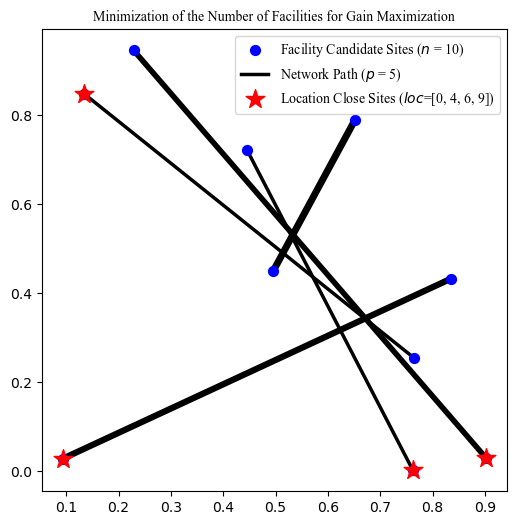

In [5]:
plt.figure(figsize=(6, 6))
plt.title('Minimization of the Number of Facilities for Gain Maximization',font = 'Times New Roman')
loc=[]
for i in selected_vector:
    loc.append(points_np[i])
plt.scatter(*zip(*points_np), c='Blue', marker='o', s=50, label=f"Facility Candidate Sites ($n$ = {num_point})",zorder=3)

for j, i in enumerate(Vp_np):
    if j==0:
        plt.plot([points_np[i[0]][0], points_np[i[1]][0]], [points_np[i[0]][1], points_np[i[1]][1]],c='black',
                 linewidth=0.5 * Fp_np[j],label=f"Network Path ($p$ = {len(Vp)})",zorder=1)
    else:
        plt.plot([points_np[i[0]][0], points_np[i[1]][0]], [points_np[i[0]][1], points_np[i[1]][1]], c='black', linewidth=0.5 * Fp_np[j], zorder=1)

plt.scatter(*zip(*loc), c="r", marker='*', s=200, label=f"Location Close Sites ($loc$={list(selected_vector)})", zorder=3)
plt.legend(loc='best',prop='Times New Roman',fontsize=12)
plt.show()

### Case2. Solving FIFLP (Minimization of the Number of Facilities for Gain Maximization) with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [6]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

We select Changping District of Beijing the study area and read partial poi points in Dongcheng District.

In [7]:
%%time
region=gpd.read_file("../data/beijing/dongcheng/dongcheng.shp")
region.head(2)

CPU times: total: 0 ns
Wall time: 12.7 ms


,ID,geometry
0,1,"POLYGON ((116.38312 39.95551, 116.38216 39.955..."
1,2,"POLYGON ((116.41141 39.88660, 116.41139 39.886..."


Partial POI data in Changping district

In [8]:
%%time
poi = gpd.read_file("../data/beijing/dongcheng/dongcheng-poi.shp")

CPU times: total: 0 ns
Wall time: 5.61 ms


In [9]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

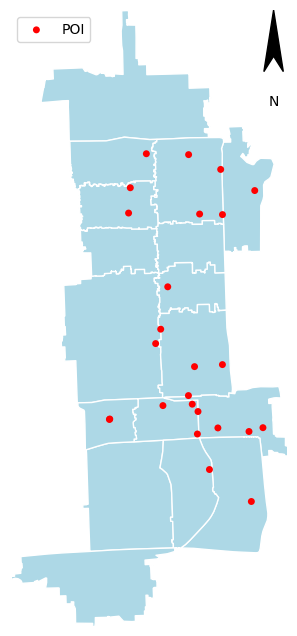

In [10]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(10, 8))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='red',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.05,ratio = 0.7)

Generate problem with real-world data

In [15]:
data = poi[['lon', 'lat']]
num_rpoints = poi.shape[0]
num_rpath=num_rpoints//2
rpoints = [(data['lon'][i], data['lat'][i]) for i in range(num_rpoints)]
rpoints_np = np.array(rpoints)
rVp = [[2*i, 2*i+1] for i in range(num_rpath)]
rVp_np = np.array(rVp)
rFp = [random.randint(1, 5) for j in range(num_rpath)]
rFp_np = np.array(rFp)
rapi = np.random.randint(10, size=(num_rpath,num_rpoints))
re = 0.3                                          # 1-ϵ :我们想要得到的最大增益G的百分比 [0,1]
rG = np.amax(rapi, axis=1).sum()                               # G:（全局增益）所有路径p的apl之和
rGe = (1-re) *rG

Output optimal solution

In [16]:
rselected_path, rselected_vector = MiFMG(num_path=num_rpath,
                                      num_vector=num_rpoints,
                                      path_vector=rVp_np,
                                      vector_gain=rapi,
                                      flow_gain=rGe,
                                      solver=GUROBI_CMD()).prob_solve()

Status: Optimal
Selected paths = [0, 1, 2, 3, 4, 5, 7, 9, 10, 11]
Selected points = [0, 2, 4, 6, 9, 10, 14, 19, 21, 23]
Minimization of the Number of Facilities for Gain Maximization = 10.0


D:\anaconda3\envs\higis\Lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


prepare the LineString and center Points to plot the solution

In [17]:
from shapely.geometry import LineString
crs = 'EPSG:4326'
lines = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
k = 0
for i in rVp:
    line = LineString([rpoints_np[i[0]], rpoints_np[i[1]]])
    lines.loc[k] = [k + 1, line]
    k=k+1
center_points = poi.iloc[rselected_vector]

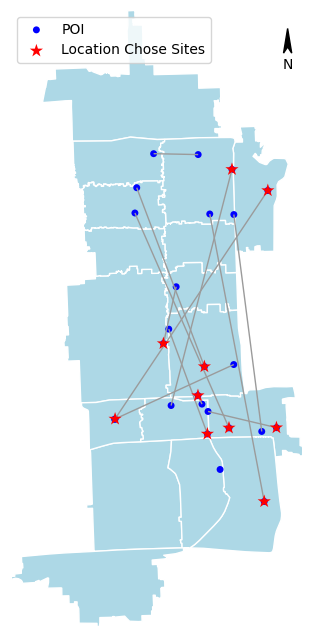

In [18]:
ax = gplt.sankey(lines,
                 projection=gcrs.Mollweide(),
                 linewidth=1,
                 color='#9B9B9B',
                 zorder=3,
                 figsize=(10, 8),)
gplt.polyplot(region,
              projection=gcrs.AlbersEqualArea(),
              edgecolor="white",
              facecolor="lightblue",
              zorder=1,
              ax=ax,)
gplt.pointplot(poi,
               extent=region.total_bounds,
               s=5,
               color='blue',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points,
               extent=region.total_bounds,
               s=10,
               color='red',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Location Chose Sites',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')